Importing modules

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics

pd.set_option('display.max_columns', None)

Importing the dataset

In [4]:
employees = pd.read_csv('Absenteeism_at_work.csv', sep=';')

Exploring the dataset

In [61]:
employees.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


In [62]:
print('Shape',employees.shape)

Shape (740, 21)


In [63]:
employees.dtypes

ID                                   int64
Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Work load Average/day              float64
Hit target                           int64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body mass index                      int64
Absenteeism time in hours            int64
dtype: object

In [64]:
employees.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

0.9041169005730316

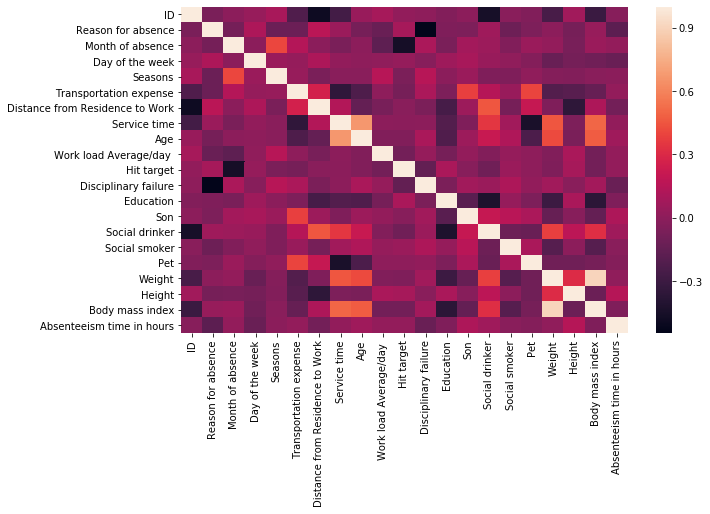

In [65]:
# Looking for the highly correlated features

plt.subplots(figsize=(10,6))
sns.heatmap(employees.corr())
employees['Weight'].corr(employees['Body mass index'])

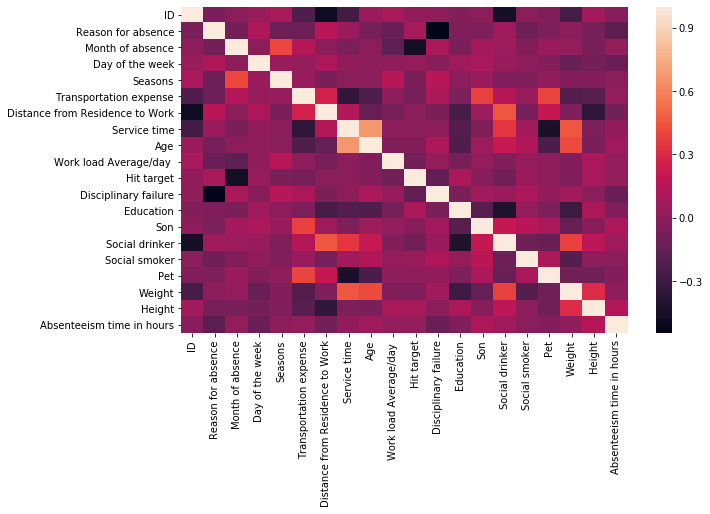

In [5]:
# Weight & Body mass index columns have a high collinearity (r=0.90), therefore I will remove the Body mass index column

plt.subplots(figsize=(10,6))
employees_2 = employees.drop(columns=['Body mass index'])
sns.heatmap(employees_2.corr())


In [6]:
# Remove ['ID','Work load Average/day ', 'Hit target'] columns

employees_3 = employees_2.drop(columns=['ID','Work load Average/day ', 'Hit target'])
employees_3.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Absenteeism time in hours
0,26,7,3,1,289,36,13,33,0,1,2,1,0,1,90,172,4
1,0,7,3,1,118,13,18,50,1,1,1,1,0,0,98,178,0
2,23,7,4,1,179,51,18,38,0,1,0,1,0,0,89,170,2
3,7,7,5,1,279,5,14,39,0,1,2,1,1,0,68,168,4
4,23,7,5,1,289,36,13,33,0,1,2,1,0,1,90,172,2


In [7]:
# Convert all categorical columns to dummies

col = ['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Education','Disciplinary failure', 
       'Son', 'Social drinker', 'Social smoker', 'Pet']

dummies = pd.get_dummies(data = employees_3, columns=col, drop_first=True)
dummies.head()

,Transportation expense,Distance from Residence to Work,Service time,Age,Weight,Height,Absenteeism time in hours,Reason for absence_1,Reason for absence_2,Reason for absence_3,Reason for absence_4,Reason for absence_5,Reason for absence_6,Reason for absence_7,Reason for absence_8,Reason for absence_9,Reason for absence_10,Reason for absence_11,Reason for absence_12,Reason for absence_13,Reason for absence_14,Reason for absence_15,Reason for absence_16,Reason for absence_17,Reason for absence_18,Reason for absence_19,Reason for absence_21,Reason for absence_22,Reason for absence_23,Reason for absence_24,Reason for absence_25,Reason for absence_26,Reason for absence_27,Reason for absence_28,Month of absence_1,Month of absence_2,Month of absence_3,Month of absence_4,Month of absence_5,Month of absence_6,Month of absence_7,Month of absence_8,Month of absence_9,Month of absence_10,Month of absence_11,Month of absence_12,Day of the week_3,Day of the week_4,Day of the week_5,Day of the week_6,Seasons_2,Seasons_3,Seasons_4,Education_2,Education_3,Education_4,Disciplinary failure_1,Son_1,Son_2,Son_3,Son_4,Social drinker_1,Social smoker_1,Pet_1,Pet_2,Pet_4,Pet_5,Pet_8
0,289,36,13,33,90,172,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
1,118,13,18,50,98,178,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0
2,179,51,18,38,89,170,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,279,5,14,39,68,168,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0
4,289,36,13,33,90,172,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0


# PREDICT IF EMPLOYEE IS A SOCIAL DRINKER

SVM

In [81]:
y_soc_d = dummies['Social drinker_1']
X_soc_d= dummies[dummies.columns.difference(['Social drinker_1'])]

X_train_soc_d, X_test_soc_d, y_train_soc_d, y_test_soc_d = train_test_split(X_soc_d, y_soc_d, test_size=0.2)

clf = svm.SVC(gamma='auto',probability=True).fit(X_train_soc_d, y_train_soc_d)
y_pred_soc_d = clf.predict(X_test_soc_d)

print("Accuracy:",metrics.accuracy_score(y_test_soc_d, y_pred_soc_d))
print("\nConfusion matrix:\n",metrics.confusion_matrix(y_test_soc_d, y_pred_soc_d))

Accuracy: 0.9797297297297297

Confusion matrix:
 [[60  3]
 [ 0 85]]


Area Under Curve: 0.9994397759103641


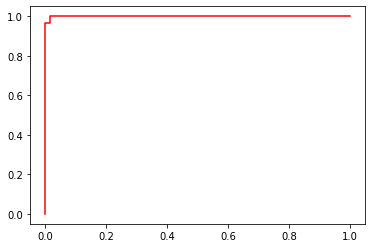

In [82]:
y_pred_proba = clf.predict_proba(X_test_soc_d)[::,1]
fpr, tpr, dummy = metrics.roc_curve(y_test_soc_d, y_pred_proba)
auc = metrics.roc_auc_score(y_test_soc_d, y_pred_proba)

plt.plot(fpr,tpr, color='r')
print('Area Under Curve:', auc)

K-Neighbors Classifier

In [129]:
from sklearn.neighbors import KNeighborsClassifier

y_socd_k = dummies['Social drinker_1']
X_socd_k = dummies[dummies.columns.difference(['Social drinker_1'])]

X_train_socd_k, X_test_socd_k, y_train_socd_k, y_test_socd_k = train_test_split(X_socd_k, y_socd_k, test_size=0.2)

model = KNeighborsClassifier(n_neighbors=5).fit(X_train_socd_k, y_train_socd_k)
model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [130]:
y_pred_socd_k = model.predict(X_test_socd_k)
print("Accuracy:",metrics.accuracy_score(y_test_socd_k, y_pred_socd_k))
print("\nConfusion matrix:\n",metrics.confusion_matrix(y_test_socd_k, y_pred_socd_k))

Accuracy: 0.972972972972973

Confusion matrix:
 [[71  3]
 [ 1 73]]


Area Under Curve: 0.9988130021913806


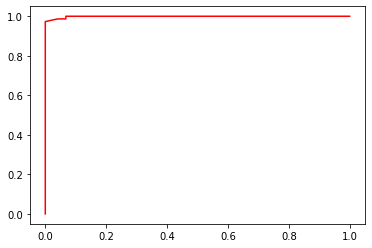

In [131]:
y_pred_proba_k = model.predict_proba(X_test_socd_k)[::,1]
fpr, tpr, dummy = metrics.roc_curve(y_test_socd_k, y_pred_proba_k)
auc = metrics.roc_auc_score(y_test_socd_k, y_pred_proba_k)

plt.plot(fpr,tpr, color='r')
print('Area Under Curve:', auc)

Decision tree

In [101]:
from sklearn.tree import DecisionTreeClassifier

y_socd_dt = dummies['Social drinker_1']
X_socd_dt  = dummies[dummies.columns.difference(['Social drinker_1'])]

X_train_socd_dt , X_test_socd_dt, y_train_socd_dt, y_test_socd_dt = train_test_split(X_socd_dt , y_socd_dt , test_size=0.2)

In [102]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train_socd_dt , y_train_socd_dt)
y_pred_socd_dt = clf.predict(X_test_socd_dt)

print("Accuracy:",metrics.accuracy_score(y_test_socd_dt, y_pred_socd_dt))
print("\nConfusion matrix:\n",metrics.confusion_matrix(y_test_socd_dt, y_pred_socd_dt))

Accuracy: 0.9864864864864865

Confusion matrix:
 [[68  0]
 [ 2 78]]


Area Under Curve: 0.9875


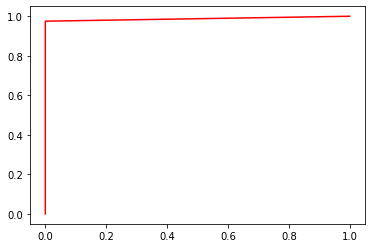

In [103]:
y_pred_proba = clf.predict_proba(X_test_socd_dt)[::,1]
fpr, tpr, dummy = metrics.roc_curve(y_test_socd_dt, y_pred_proba)
auc = metrics.roc_auc_score(y_test_socd_dt, y_pred_proba)

plt.plot(fpr,tpr, color='r')
print('Area Under Curve:', auc)

Logistic Regression

In [137]:
from sklearn.linear_model import LogisticRegression

y_socd_log = dummies_abs['Social drinker_1']
X_socd_log   = dummies_abs[dummies_abs.columns.difference(['Social drinker_1'])]

X_train_socd_log, X_test_socd_log, y_train_socd_log, y_test_socd_log = train_test_split(X_socd_log, y_socd_log, test_size=0.2)

model = LogisticRegression().fit(X_train_socd_log, y_train_socd_log)

C:\Users\anete\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [138]:
from sklearn.metrics import confusion_matrix

y_pred_test = model.predict(X_test_socd_log)

print("Accuracy:",metrics.accuracy_score(y_test_socd_log, y_pred_test))
print("\nConfusion matrix:\n",metrics.confusion_matrix(y_test_socd_log, y_pred_test))


Accuracy: 0.9459459459459459

Confusion matrix:
 [[59  6]
 [ 2 81]]


Area Under Curve: 0.9840593141797961


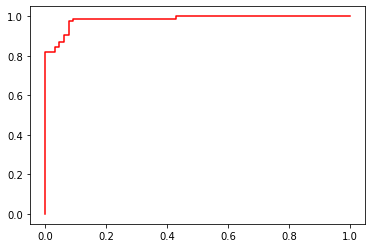

In [139]:
y_pred_proba = model.predict_proba(X_test_socd_log)[::,1]
fpr, tpr, dummy = metrics.roc_curve(y_test_socd_log, y_pred_proba)
auc = metrics.roc_auc_score(y_test_socd_log, y_pred_proba)

plt.plot(fpr,tpr, color='r')
print('Area Under Curve:', auc)

# PREDICT IF EMPLOYEE WILL BE ABSENT

In [10]:
dummies['Absenteeism time in hours'].describe()

count    740.000000
mean       6.924324
std       13.330998
min        0.000000
25%        2.000000
50%        3.000000
75%        8.000000
max      120.000000
Name: Absenteeism time in hours, dtype: float64

In [8]:
# Create an additional column 'Absenteeism': 
    # 1 if employee is absent more than 6.9 h/month
    # 0 if employee is absent less than 6.9 h/month


col = 'Absenteeism time in hours'
conditions = [dummies[col] > 6.9, dummies[col] <= 6.9]
choices = [1,0]

dummies["Absenteeism"] = np.select(conditions, choices, default=np.nan)

In [9]:
dummies_abs = dummies.drop(columns=['Absenteeism time in hours'])
dummies_abs.head()

,Transportation expense,Distance from Residence to Work,Service time,Age,Weight,Height,Reason for absence_1,Reason for absence_2,Reason for absence_3,Reason for absence_4,Reason for absence_5,Reason for absence_6,Reason for absence_7,Reason for absence_8,Reason for absence_9,Reason for absence_10,Reason for absence_11,Reason for absence_12,Reason for absence_13,Reason for absence_14,Reason for absence_15,Reason for absence_16,Reason for absence_17,Reason for absence_18,Reason for absence_19,Reason for absence_21,Reason for absence_22,Reason for absence_23,Reason for absence_24,Reason for absence_25,Reason for absence_26,Reason for absence_27,Reason for absence_28,Month of absence_1,Month of absence_2,Month of absence_3,Month of absence_4,Month of absence_5,Month of absence_6,Month of absence_7,Month of absence_8,Month of absence_9,Month of absence_10,Month of absence_11,Month of absence_12,Day of the week_3,Day of the week_4,Day of the week_5,Day of the week_6,Seasons_2,Seasons_3,Seasons_4,Education_2,Education_3,Education_4,Disciplinary failure_1,Son_1,Son_2,Son_3,Son_4,Social drinker_1,Social smoker_1,Pet_1,Pet_2,Pet_4,Pet_5,Pet_8,Absenteeism
0,289,36,13,33,90,172,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0.0
1,118,13,18,50,98,178,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0.0
2,179,51,18,38,89,170,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.0
3,279,5,14,39,68,168,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0.0
4,289,36,13,33,90,172,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0.0


SVM

In [148]:
y_abs = dummies_abs['Absenteeism']
X_abs = dummies_abs[dummies_abs.columns.difference(['Absenteeism'])]

X_train_abs, X_test_abs, y_train_abs, y_test_abs = train_test_split(X_abs, y_abs, test_size=0.2)

clf = svm.SVC(gamma='auto',probability=True).fit(X_train_abs, y_train_abs)
y_pred_abs = clf.predict(X_test_abs)

print("Accuracy:",metrics.accuracy_score(y_test_abs, y_pred_abs))
print("\nConfusion matrix:\n",metrics.confusion_matrix(y_test_abs, y_pred_abs))

Accuracy: 0.6756756756756757

Confusion matrix:
 [[78 13]
 [35 22]]


Area Under Curve: 0.7967562557924004


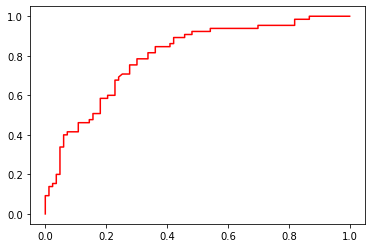

In [143]:
y_pred_proba = clf.predict_proba(X_test_abs)[::,1]
fpr, tpr, dummy = metrics.roc_curve(y_test_abs, y_pred_proba)
auc = metrics.roc_auc_score(y_test_abs, y_pred_proba)

plt.plot(fpr,tpr, color='r')
print('Area Under Curve:', auc)

In [25]:
########### RANDOM SAMPLE TO TEST ###############

def get_random_data(dataset): 
    return dataset.sample()

In [26]:
random = get_random_data(X_test_abs)
random

,Absenteeism time in hours,Age,Day of the week_3,Day of the week_4,Day of the week_5,Day of the week_6,Disciplinary failure_1,Distance from Residence to Work,Education_2,Education_3,Education_4,Height,Month of absence_1,Month of absence_10,Month of absence_11,Month of absence_12,Month of absence_2,Month of absence_3,Month of absence_4,Month of absence_5,Month of absence_6,Month of absence_7,Month of absence_8,Month of absence_9,Pet_1,Pet_2,Pet_4,Pet_5,Pet_8,Reason for absence_1,Reason for absence_10,Reason for absence_11,Reason for absence_12,Reason for absence_13,Reason for absence_14,Reason for absence_15,Reason for absence_16,Reason for absence_17,Reason for absence_18,Reason for absence_19,Reason for absence_2,Reason for absence_21,Reason for absence_22,Reason for absence_23,Reason for absence_24,Reason for absence_25,Reason for absence_26,Reason for absence_27,Reason for absence_28,Reason for absence_3,Reason for absence_4,Reason for absence_5,Reason for absence_6,Reason for absence_7,Reason for absence_8,Reason for absence_9,Seasons_2,Seasons_3,Seasons_4,Service time,Social drinker_1,Social smoker_1,Son_1,Son_2,Son_3,Son_4,Transportation expense,Weight
611,2,28,0,0,0,0,0,26,0,0,0,169,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,9,0,0,1,0,0,0,225,69


In [27]:
y_pred_test = clf.predict(random)
y_pred_test

array([0.])

In [29]:
y_test_abs[random.index]

611    0.0
Name: Absenteeism, dtype: float64

K-Neighbors Classifier

In [132]:
from sklearn.neighbors import KNeighborsClassifier

y_abs_kn = dummies_abs['Absenteeism']
X_abs_kn = dummies_abs[dummies_abs.columns.difference(['Absenteeism'])]

X_train_abs_kn, X_test_abs_kn, y_train_abs_kn, y_test_abs_kn = train_test_split(X_abs_kn, y_abs_kn, test_size=0.2)

model_abs = KNeighborsClassifier(n_neighbors=5).fit(X_train_abs_kn, y_train_abs_kn)
model_abs

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [133]:
y_pred_abs_kn = model_abs.predict(X_test_abs_kn)
print("Accuracy:",metrics.accuracy_score(y_test_abs_kn, y_pred_abs_kn))
print("\nConfusion matrix:\n",metrics.confusion_matrix(y_test_abs_kn, y_pred_abs_kn))

Accuracy: 0.6824324324324325

Confusion matrix:
 [[74 13]
 [34 27]]


Area Under Curve: 0.752967778405879


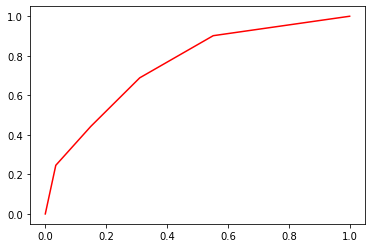

In [134]:
y_pred_proba = model_abs.predict_proba(X_test_abs_kn)[::,1]
fpr, tpr, dummy = metrics.roc_curve(y_test_abs_kn, y_pred_proba)
auc = metrics.roc_auc_score(y_test_abs_kn, y_pred_proba)

plt.plot(fpr,tpr, color='r')
print('Area Under Curve:', auc)

DECISION TREE

In [114]:
from sklearn.tree import DecisionTreeClassifier

y_abs_dt = dummies_abs['Absenteeism']
X_abs_dt  = dummies_abs[dummies_abs.columns.difference(['Absenteeism'])]

X_train_abs_dt , X_test_abs_dt , y_train_abs_dt , y_test_abs_dt  = train_test_split(X_abs_dt , y_abs_dt , test_size=0.2)

In [118]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train_abs_dt , y_train_abs_dt )
y_pred_abs_dt = clf.predict(X_test_abs_dt)

print("Accuracy:",metrics.accuracy_score(y_test_abs_dt, y_pred_abs_dt))
print("\nConfusion matrix:\n",metrics.confusion_matrix(y_test_abs_dt, y_pred_abs_dt))

Accuracy: 0.7432432432432432

Confusion matrix:
 [[63 21]
 [17 47]]


Area Under Curve: 0.7421875


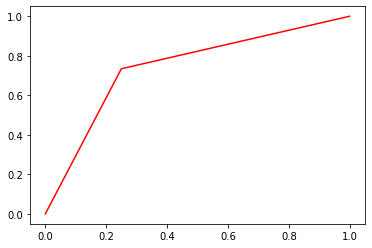

In [119]:
y_pred_proba = clf.predict_proba(X_test_abs_dt)[::,1]
fpr, tpr, dummy = metrics.roc_curve(y_test_abs_dt, y_pred_proba)
auc = metrics.roc_auc_score(y_test_abs_dt, y_pred_proba)

plt.plot(fpr,tpr, color='r')
print('Area Under Curve:', auc)

LOGISTIC REGRESSION

In [123]:
from sklearn.linear_model import LogisticRegression

y_abs_log = dummies_abs['Absenteeism']
X_abs_log  = dummies_abs[dummies_abs.columns.difference(['Absenteeism'])]

X_train_abs_log , X_test_abs_log, y_train_abs_log, y_test_abs_log = train_test_split(X_abs_log, y_abs_log, test_size=0.2)

model = LogisticRegression().fit(X_train_abs_log, y_train_abs_log)

C:\Users\anete\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [127]:
from sklearn.metrics import confusion_matrix

y_pred_test = model.predict(X_test_abs_log)

print("Accuracy:",metrics.accuracy_score(y_test_abs_log, y_pred_test))
print("\nConfusion matrix:\n",metrics.confusion_matrix(y_test_abs_log, y_pred_test))


Accuracy: 0.7635135135135135

Confusion matrix:
 [[72 20]
 [15 41]]


Area Under Curve: 0.8522903726708074


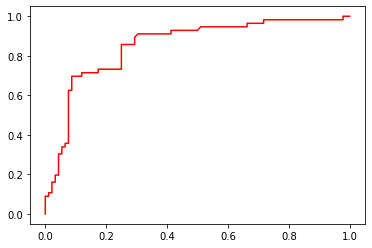

In [128]:
y_pred_proba = model.predict_proba(X_test_abs_log)[::,1]
fpr, tpr, dummy = metrics.roc_curve(y_test_abs_log, y_pred_proba)
auc = metrics.roc_auc_score(y_test_abs_log, y_pred_proba)

plt.plot(fpr,tpr, color='r')
print('Area Under Curve:', auc)

# Other

Linear regression model

In [149]:
y = dummies['Absenteeism time in hours'] 
X = dummies[dummies.columns.difference(['Absenteeism time in hours'])]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fitting

regressor = LinearRegression().fit(X_train, y_train)


"""
# Vizualizing Training set

plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Absenteeism VS Age (Training set)')
plt.xlabel('Age')
plt.ylabel('Absent (hours/month)')
plt.show()

# Visualizing Test set

plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Absenteeism VS Age (Test set)')
plt.xlabel('Age')
plt.ylabel('Absent (hours/month)')
plt.show()

"""

"\n# Vizualizing Training set\n\nplt.scatter(X_train, y_train, color='red')\nplt.plot(X_train, regressor.predict(X_train), color='blue')\nplt.title('Absenteeism VS Age (Training set)')\nplt.xlabel('Age')\nplt.ylabel('Absent (hours/month)')\nplt.show()\n\n# Visualizing Test set\n\nplt.scatter(X_test, y_test, color='red')\nplt.plot(X_train, regressor.predict(X_train), color='blue')\nplt.title('Absenteeism VS Age (Test set)')\nplt.xlabel('Age')\nplt.ylabel('Absent (hours/month)')\nplt.show()\n\n"

In [150]:
y_pred = regressor.predict(X_test)

test_set_r2 = r2_score(y_test, y_pred)
print('R-squared:',test_set_r2)


R-squared: -0.27301771553606735


Absenteeism time in hours: Support Vector Machine (SVM)

In [168]:
y = empl_dummy_3['Absenteeism time in hours']
X = empl_dummy_3[empl_dummy_3.columns.difference(['Absenteeism time in hours'])]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [169]:
clf = svm.SVC(kernel='linear',probability=True).fit(X_train, y_train)

y_pred = clf.predict(X_test)


In [170]:
#clf.score(X_test, y_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.46621621621621623


Absenteeism time in hours: K-Neighbors Classifier

In [28]:
from sklearn.neighbors import KNeighborsClassifier

y = dummies['Absenteeism time in hours']
X = dummies[dummies.columns.difference(['Absenteeism time in hours'])]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [30]:
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#print("Confusion matrix:",metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.43243243243243246


Absenteeism time in hours: DECISION TREE (regression)

In [32]:
from sklearn.tree import DecisionTreeRegressor  
regressor = DecisionTreeRegressor(random_state = 0)  

y = dummies['Absenteeism time in hours']
X = dummies[dummies.columns.difference(['Absenteeism time in hours'])]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

regressor.fit(X_train, y_train) 


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')